Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Make sure that in addition to the code, you provide written answers for all questions of the assignment. 

## Term Project: TorontoRobbery - Data Analysis 


For this term project, we will analyze the open dataset of toronto robbery provided by Toronto City(http://data.torontopolice.on.ca/datasets/281a5ad35c60458cb7de41c5ae99d5b5_0.) . 

We are going to read the data from the file into pandas DataFrame. Analyze, clean and transform the data to answer the following question:

### Questions:

**TYPE:**

1. What type of robbery is most common? Least common?
2. Does this change from 2014 to 2017?
            -year by year comparison
            -2018 - 2014 comparison
            
**TIME:**

1. At what time is a robbery most likely to occur? Least likely?
            -Time/Hour of the day
            -Morning/Afternoon/Evening ← a new categorical variable
            -Day of week
            -Month of year
            -Season ← a new categorical variable
2. Does this change from 2014 to 2017?
            -year by year comparison
            -2017 - 2014 comparison

**LOCATION:**

1. In what areas do most robberies occur? Least robberies?
            -Neighbourhood
            -Location (commercial vs. outside)
            -Robbery relative to Income
            -Robbery relation to Education level
2. % of neighbourhood residents whose mother tongue is not English or French

3. % of neighbourhood residents who are unemployed

4. % of neighbourhood residents who are movers

**RESPONSE:**
1. Which police divisions respond to the most robberies?
2. How long do people wait to report a robbery (e.g. reported date vs. occuring date)?
3. Which robbery types are reported the most quickly? Least quickly?


**PREDICTION:** 

 - Based on a given time and location, how likely are you to be robbed?
     - Note: must define time (e.g. hour vs. day) and location

In [58]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [59]:
# Load CSV file into Panda's DataFrame 

robbery_data = pd.read_csv('Data/robbery_data.csv',
                          index_col = "Record_ID")

neighbourhood_data = pd.read_csv('Data/neighbourhood.csv',
                          index_col = "Neighbourhood_ID")

offence_data = pd.read_csv('Data/offences.csv',
                          index_col = "Offence_ID")

neighbourhood_data = pd.read_csv('Data/neighbourhood.csv',
                          index_col = "Neighbourhood_ID")

premises_data =  pd.read_csv('Data/premise_types.csv',
                          index_col = "Premise_Type_ID")

daytime_data = pd.read_csv('Data/time_of_day.csv',
                          index_col = "Time_Of_Day_ID")


In [60]:
## Start your work from here... 
weather_data_2014 = pd.read_csv('Data/weather/eng-daily-01012014-12312014.csv',header=[22])
weather_data_2015 = pd.read_csv('Data/weather/eng-daily-01012015-12312015.csv',header=[22])
weather_data_2016 = pd.read_csv('Data/weather/eng-daily-01012016-12312016.csv',header=[22])
weather_data_2017 = pd.read_csv('Data/weather/eng-daily-01012017-12312017.csv',header=[22])

calendar=pd.read_csv('Data/dates.csv')

In [61]:
weather_data_2018 = pd.read_csv('Data/weather/eng-daily-01012018-12312018.csv',header=[23])

In [62]:
weather_data = pd.concat([weather_data_2014,weather_data_2015,weather_data_2016
                         ,weather_data_2017,weather_data_2018],sort=False)

In [63]:
#didnt work because 2018 header should be 23.but good code for combine multiple csv to one dataframe. 
# import glob

# path = 'Data\weather'                     # use your path
# all_files = glob.glob("Data/weather/*.csv")     # advisable to use os.path.join as this makes concatenation OS independent

# all_files = [
# 'Data/weather/eng-daily-01012014-12312014.csv',
#  'Data/weather/eng-daily-01012015-12312015.csv',
#  'Data/weather/eng-daily-01012016-12312016.csv',
#  'Data/weather/eng-daily-01012017-12312017.csv',
#  'Data/weather/eng-daily-01012018-12312018.csv']

# df_from_each_file = (pd.read_csv(f,header=[22]) for f in all_files)
# concatenated_df   = pd.concat(df_from_each_file,axis=0,sort=True)
# # doesn't create a list, nor does it append to one
# concatenated_df
# concatenated_df[["Date/Time","Mean Temp (°C)","Total Rain (mm)","Total Snow (cm)","Snow on Grnd (cm)"]]


In [64]:

weather_data_trimmed=weather_data[["Date/Time","Mean Temp (°C)","Total Rain (mm)","Total Snow (cm)","Snow on Grnd (cm)"]]

In [65]:
robbery_data.describe()

,Reported_After_Occurrence_WEEKS,Reported_After_Occurrence_DAYS,Reported_After_Occurrence_HOURS,Reported_After_Occurrence_MINUTES,Occurred_Time_Of_Day_ID,Reported_Time_Of_Day_ID,Neighbourhood_ID,Offence_ID,Premise_Type_ID,Division_Num,occurrencehour,reportedhour
count,18128.000000,18128.000000,18128.000000,1.812800e+04,18128.000000,18128.000000,18128.000000,18128.000000,18128.000000,18128.000000,18128.000000,18128.000000
mean,0.457193,3.179887,76.310293,4.583572e+03,13.545951,13.538945,74.626158,177.034422,2.263129,34.717068,13.545951,13.538945
std,18.246392,127.731791,3065.542030,1.839326e+05,7.458074,7.372305,41.869756,42.813021,1.665476,14.739656,7.458074,7.372305
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,100.000000,1.000000,11.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,2.000000e+00,8.000000,8.000000,36.000000,150.000000,1.000000,22.750000,8.000000,8.000000
50%,0.000000,0.000000,0.000000,1.300000e+01,15.000000,15.000000,75.000000,200.000000,1.000000,41.000000,15.000000,15.000000
75%,0.000000,0.000000,2.000000,1.020000e+02,20.000000,20.000000,113.000000,210.000000,4.000000,51.000000,20.000000,20.000000
max,1815.000000,12703.000000,304871.000000,1.829226e+07,23.000000,23.000000,140.000000,220.000000,5.000000,55.000000,23.000000,23.000000


In [66]:
# robbery_data.min() #
# robbery_data.max() #2018
# robbery_data.head(1)

In [67]:
master_data=robbery_data[['Occurrence_DateTime','Occurence_Date','occurrencehour',
              'Occurred_Time_Of_Day_ID']].join(
    daytime_data,on='Occurred_Time_Of_Day_ID')

In [68]:
weather_data_trimmed.set_index('Date/Time',inplace=True)

In [69]:
master_data=master_data.join(weather_data_trimmed,on='Occurence_Date')

In [70]:
print(master_data.columns)
print (calendar.columns)

Index(['Occurrence_DateTime', 'Occurence_Date', 'occurrencehour',
       'Occurred_Time_Of_Day_ID', 'Time_Of_Day', 'Sky_Light_Category',
       'Mean Temp (°C)', 'Total Rain (mm)', 'Total Snow (cm)',
       'Snow on Grnd (cm)'],
      dtype='object')
Index(['Conformed_Date', 'Conformed_Date_INT', 'Conformed_Date_Display',
       'Calendar_Day_Of_Week', 'Calendar_Year', 'Calendar_Quarter',
       'Calendar_Quarter_Display', 'Calendar_Month', 'Calendar_Month_Display',
       'Is_Holiday', 'Holiday_Name', 'Is_ON_Holiday', 'Calendar_Part_Of_Week',
       'Time_Of_Month', 'Calendar_Month_Year', 'Calendar_Month_Year_SORT',
       'Calendar_Quarter_Year'],
      dtype='object')


In [71]:
calendar['Conformed_Date'] = pd.to_datetime(calendar.Conformed_Date)
master_data['Occurence_Date'] = pd.to_datetime(master_data.Occurence_Date)

In [72]:
#calendar.set_index('Conformed_Date',inplace=True)

In [73]:
print(calendar.index.dtype)
print(master_data['Occurence_Date'].dtype)

int64
datetime64[ns]


In [74]:
master_data=master_data.join(calendar.set_index('Conformed_Date'),on='Occurence_Date')

In [75]:
master_data=master_data[master_data.Calendar_Year >= 2014.0]

At what time is a robbery most likely to occur? Least likely?
     -Time/Hour of the day
     -Morning/Afternoon/Evening ← a new categorical variable
     -Day of week
     -Month of year
     -Season ← a new categorical variable

In [76]:
print (master_data.columns)
print (master_data.dtypes)

Index(['Occurrence_DateTime', 'Occurence_Date', 'occurrencehour',
       'Occurred_Time_Of_Day_ID', 'Time_Of_Day', 'Sky_Light_Category',
       'Mean Temp (°C)', 'Total Rain (mm)', 'Total Snow (cm)',
       'Snow on Grnd (cm)', 'Conformed_Date_INT', 'Conformed_Date_Display',
       'Calendar_Day_Of_Week', 'Calendar_Year', 'Calendar_Quarter',
       'Calendar_Quarter_Display', 'Calendar_Month', 'Calendar_Month_Display',
       'Is_Holiday', 'Holiday_Name', 'Is_ON_Holiday', 'Calendar_Part_Of_Week',
       'Time_Of_Month', 'Calendar_Month_Year', 'Calendar_Month_Year_SORT',
       'Calendar_Quarter_Year'],
      dtype='object')
Occurrence_DateTime                 object
Occurence_Date              datetime64[ns]
occurrencehour                       int64
Occurred_Time_Of_Day_ID              int64
Time_Of_Day                         object
Sky_Light_Category                  object
Mean Temp (°C)                     float64
Total Rain (mm)                    float64
Total Snow (cm)         

In [77]:
#Morning/Afternoon/Evening
#nlargest(3)
#Night + Early Morning
timeOfDay=master_data[['Calendar_Year','Time_Of_Day','Occurrence_DateTime']]\
.groupby(['Calendar_Year','Time_Of_Day']).count()#\
# .reset_index()\
# .sort_values('Occurrence_DateTime',ascending=False);
timeOfDay

Occurrence_DateTime
Calendar_Year Time_Of_Day                       
2014.0        Afternoon                      905
              Early Morning                  835
              Evening                        624
              Morning                        278
              Night                          943
2015.0        Afternoon                      813
              Early Morning                  830
              Evening                        570
              Morning                        294
              Night                          957
2016.0        Afternoon                      812
              Early Morning                  907
              Evening                        578
              Morning                        291
              Night                         1025
2017.0        Afternoon                      892
              Early Morning                  977
              Evening                        648
              Morning                        303
              Night                         1081
2018.0        Afternoon                      857
              Early Morning                  805
              Evening                        593
              Morning                        319
              Night                          948

In [78]:
#Day of week

dayOfWeek=master_data[['Calendar_Year','Calendar_Day_Of_Week','occurrencehour']]\
.groupby(['Calendar_Year','Calendar_Day_Of_Week'])\
.count()\
.rename(columns={'occurrencehour':'Number_of_Occurrence'})
#.sort_values('Occurrence_DateTime',ascending=False)
dayOfWeek
#Friday and Saturday has the highest occurence, infact, as the week goes, the robbery increases 

Number_of_Occurrence
Calendar_Year Calendar_Day_Of_Week                      
2014.0        1.0                                    476
              2.0                                    479
              3.0                                    512
              4.0                                    530
              5.0                                    490
              6.0                                    546
              7.0                                    552
2015.0        1.0                                    472
              2.0                                    415
              3.0                                    512
              4.0                                    486
              5.0                                    527
              6.0                                    567
              7.0                                    485
2016.0        1.0                                    491
              2.0                                    491
              3.0                                    465
              4.0                                    522
              5.0                                    497
              6.0                                    526
              7.0                                    621
2017.0        1.0                                    555
              2.0                                    542
              3.0                                    528
              4.0                                    514
              5.0                                    494
              6.0                                    661
              7.0                                    607
2018.0        1.0                                    477
              2.0                                    505
              3.0                                    513
              4.0                                    491
              5.0                                    508
              6.0                                    521
              7.0                                    507

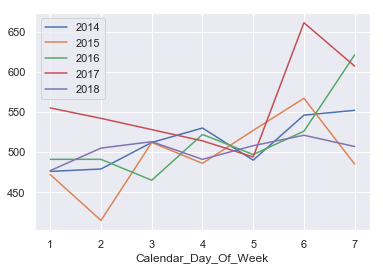

In [79]:
dayOfWeek.reset_index(inplace=True)


ax = plt.gca()
dayOfWeek[dayOfWeek['Calendar_Year']==2014].plot(kind='line',x='Calendar_Day_Of_Week',y='Number_of_Occurrence',ax=ax)
dayOfWeek[dayOfWeek['Calendar_Year']==2015].plot(kind='line',x='Calendar_Day_Of_Week',y='Number_of_Occurrence',ax=ax)
dayOfWeek[dayOfWeek['Calendar_Year']==2016].plot(kind='line',x='Calendar_Day_Of_Week',y='Number_of_Occurrence',ax=ax)
dayOfWeek[dayOfWeek['Calendar_Year']==2017].plot(kind='line',x='Calendar_Day_Of_Week',y='Number_of_Occurrence',ax=ax)
dayOfWeek[dayOfWeek['Calendar_Year']==2018].plot(kind='line',x='Calendar_Day_Of_Week',y='Number_of_Occurrence',ax=ax)

ax.legend(["2014", "2015","2016","2017","2018"]);

# plt.show()



In [80]:
dayOfweek_pivoted = dayOfWeek.pivot(index='Calendar_Day_Of_Week', columns='Calendar_Year', values='Number_of_Occurrence')

dayOfweek_pivoted['Total']=dayOfweek_pivoted.sum(axis=1)
# total: Sunday is 1. Saturday is 7
dayOfweek_pivoted

Calendar_Year,2014.0,2015.0,2016.0,2017.0,2018.0,Total
Calendar_Day_Of_Week,,,,,,
1.0,476,472,491,555,477,2471
2.0,479,415,491,542,505,2432
3.0,512,512,465,528,513,2530
4.0,530,486,522,514,491,2543
5.0,490,527,497,494,508,2516
6.0,546,567,526,661,521,2821
7.0,552,485,621,607,507,2772


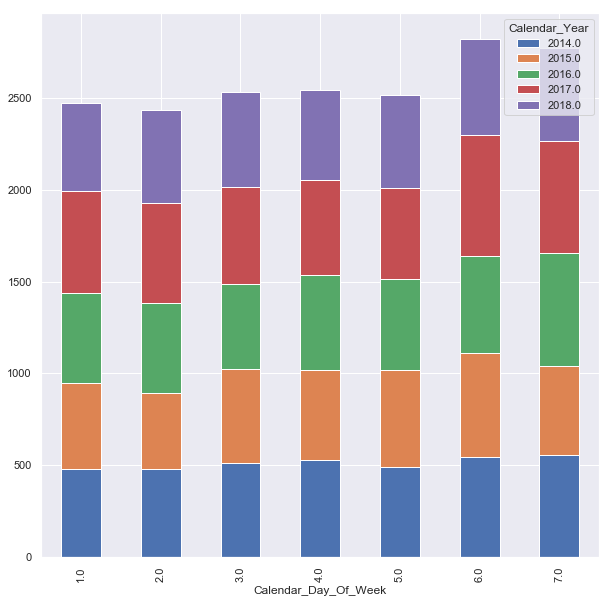

In [81]:
ax=dayOfWeek.pivot(index='Calendar_Day_Of_Week', columns='Calendar_Year', values='Number_of_Occurrence').plot(kind='bar', stacked=True, figsize=(10, 10));


In [82]:
master_data[['Calendar_Day_Of_Week','Occurrence_DateTime']].head(1)

,Calendar_Day_Of_Week,Occurrence_DateTime
Record_ID,,
111194,3.0,2014-01-07 12:56:00.000


In [83]:
dayOfWeek['Calendar_Year']=dayOfWeek['Calendar_Year'].astype(int)
dayOfWeek.dtypes


Calendar_Year             int32
Calendar_Day_Of_Week    float64
Number_of_Occurrence      int64
dtype: object

In [84]:

monthOfYear=master_data[['Calendar_Month_Year_SORT','occurrencehour']]\
.groupby(['Calendar_Month_Year_SORT'])\
.count()\
.rename(columns={'occurrencehour':'Number_of_Occurrence'})\
.reset_index()
#.sort_values('Occurrence_DateTime',ascending=False)
monthOfYear

,Calendar_Month_Year_SORT,Number_of_Occurrence
0,2014001.0,260
1,2014002.0,275
2,2014003.0,288
3,2014004.0,286
4,2014005.0,363
5,2014006.0,284
6,2014007.0,305
7,2014008.0,240
8,2014009.0,343
9,2014010.0,413


In [85]:
# monthOfYear=sns.lineplot( 'Calendar_Month_Year_SORT','Number_of_Occurrence',data=year_df)
# # control x and y limits
# # Set the `xlim`
# monthOfYear.set(xlim=(2014001, 2018012))
# monthOfYear.set(ylim=(0, 700))
# sns.set(rc={'figure.figsize':(20.7,8.27)})



# # Show the plot
# monthOfYear


In [86]:
#Holiday data is not useful.


isHoliday=master_data[['Calendar_Year','Is_ON_Holiday','occurrencehour']]\
.groupby(['Calendar_Year','Is_ON_Holiday'])\
.count()\
.rename(columns={'occurrencehour':'Number_of_Occurrence'})#\
#.reset_index()
#.sort_values('Occurrence_DateTime',ascending=False)
isHoliday.head()

Number_of_Occurrence
Calendar_Year Is_ON_Holiday                      
2014.0        0.0                            3486
              1.0                              99
2015.0        0.0                            3375
              1.0                              89
2016.0        0.0                            3613

In [87]:
year_total=master_data[['Calendar_Year','occurrencehour']]\
.groupby(['Calendar_Year'])\
.count()\
.rename(columns={'occurrencehour':'Number_of_Occurrence'})#\
#.reset_index()
#.sort_values('Occurrence_DateTime',ascending=False)
year_total.head()

,Number_of_Occurrence
Calendar_Year,
2014.0,3585
2015.0,3464
2016.0,3613
2017.0,3901
2018.0,3522


In [88]:
master_data['Mean Temp (°C)'].describe()
weather_data['Mean Temp (°C)'].describe()
#max is 30, min is -22 

count    1824.000000
mean        8.930976
std        11.122233
min       -22.300000
25%         0.600000
50%         9.000000
75%        18.800000
max        30.500000
Name: Mean Temp (°C), dtype: float64

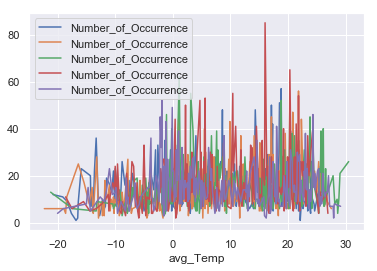

In [89]:
#Snow
temp_df=master_data[['Calendar_Year','Mean Temp (°C)','occurrencehour',]]\
.groupby(['Calendar_Year','Mean Temp (°C)']).count().reset_index()\
.rename(columns={'Mean Temp (°C)':'avg_Temp','occurrencehour':'Number_of_Occurrence'})

#defintely no snowy day.


ax = plt.gca()
temp_df[temp_df['Calendar_Year']==2014].plot(kind='line',x='avg_Temp',y='Number_of_Occurrence',ax=ax)
temp_df[temp_df['Calendar_Year']==2015].plot(kind='line',x='avg_Temp',y='Number_of_Occurrence',ax=ax)
temp_df[temp_df['Calendar_Year']==2016].plot(kind='line',x='avg_Temp',y='Number_of_Occurrence',ax=ax)
temp_df[temp_df['Calendar_Year']==2017].plot(kind='line',x='avg_Temp',y='Number_of_Occurrence',ax=ax)
temp_df[temp_df['Calendar_Year']==2018].plot(kind='line',x='avg_Temp',y='Number_of_Occurrence',ax=ax)

# ax.legend(["2014", "2015","2016","2017","2018"]);

# plt.show()
#'Snow on Grnd (cm)'



In [90]:
bins = [-30,-20, -10, 0, 10,20,30,40]
labels = ["-30~-20","-20~-10","-10~0","0~10","10~20","20~30","30~40"]
master_data['TempBin(°C)'] = pd.cut(master_data['Mean Temp (°C)'], bins=bins, labels=labels)
master_data.head(2)

,Occurrence_DateTime,Occurence_Date,occurrencehour,Occurred_Time_Of_Day_ID,Time_Of_Day,Sky_Light_Category,Mean Temp (°C),Total Rain (mm),Total Snow (cm),Snow on Grnd (cm),...,Calendar_Month_Display,Is_Holiday,Holiday_Name,Is_ON_Holiday,Calendar_Part_Of_Week,Time_Of_Month,Calendar_Month_Year,Calendar_Month_Year_SORT,Calendar_Quarter_Year,TempBin(°C)
Record_ID,,,,,,,,,,,,,,,,,,,,,
111194,2014-01-07 12:56:00.000,2014-01-07,12,12,Afternoon,Daylight,-20.8,0.0,0.0,12.0,...,January,0.0,NaN,0.0,Weekday,Begin of Month,2014 Jan,2014001.0,2014 Q1,-30~-20
111212,2015-06-09 19:00:00.000,2015-06-09,19,19,Evening,Darkness,18.8,2.2,0.0,NaN,...,June,0.0,NaN,0.0,Weekday,Begin of Month,2015 Jun,2015006.0,2015 Q2,10~20


In [91]:
#Tempeture: 
master_data[['Calendar_Year','TempBin(°C)','Occurence_Date',]]\
.groupby(['Calendar_Year','TempBin(°C)']).count()\
.rename(columns={'occurrencehour':'Number_of_Occurrence'})


Occurence_Date
Calendar_Year TempBin(°C)                
2014.0        -30~-20                12.0
              -20~-10               330.0
              -10~0                 615.0
              0~10                  992.0
              10~20                1140.0
              20~30                 496.0
              30~40                   NaN
2015.0        -30~-20                 6.0
              -20~-10               273.0
              -10~0                 386.0
              0~10                 1001.0
              10~20                1177.0
              20~30                 621.0
              30~40                   NaN
2016.0        -30~-20                13.0
              -20~-10                42.0
              -10~0                 629.0
              0~10                 1120.0
              10~20                 785.0
              20~30                 998.0
              30~40                  26.0
2017.0        -30~-20                 NaN
              -20~-10               128.0
              -10~0                 580.0
              0~10                 1108.0
              10~20                1225.0
              20~30                 837.0
              30~40                   NaN
2018.0        -30~-20                 4.0
              -20~-10               116.0
              -10~0                 806.0
              0~10                 1060.0
              10~20                 692.0
              20~30                 838.0
              30~40                   NaN

In [92]:
master_data[['Total Rain (mm)', 'Total Snow (cm)','Snow on Grnd (cm)']].describe()
weather_data[['Total Rain (mm)', 'Total Snow (cm)','Snow on Grnd (cm)']].describe()

#max rain 44.6
#max snow 17.4
#max snow on Grnd 25

,Total Rain (mm),Total Snow (cm),Snow on Grnd (cm)
count,1813.000000,1820.000000,478.000000
mean,1.804413,0.267912,4.690377
std,4.759542,1.274654,6.139909
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,2.000000
75%,0.600000,0.000000,8.000000
max,44.600000,17.400000,25.000000


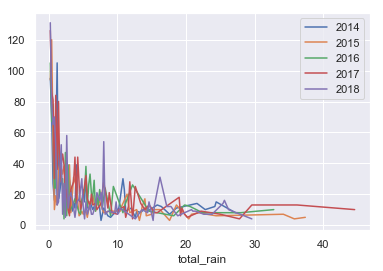

In [93]:
#Snow
rainday=master_data[['Calendar_Year','Total Rain (mm)','occurrencehour',]]\
.groupby(['Calendar_Year','Total Rain (mm)']).count().reset_index()\
.rename(columns={'Total Rain (mm)':'total_rain','occurrencehour':'Number_of_Occurrence'})

#defintely no snowy day.

rainday=rainday[rainday.total_rain> 0]

ax = plt.gca()
rainday[rainday['Calendar_Year']==2014].plot(kind='line',x='total_rain',y='Number_of_Occurrence',ax=ax)
rainday[rainday['Calendar_Year']==2015].plot(kind='line',x='total_rain',y='Number_of_Occurrence',ax=ax)
rainday[rainday['Calendar_Year']==2016].plot(kind='line',x='total_rain',y='Number_of_Occurrence',ax=ax)
rainday[rainday['Calendar_Year']==2017].plot(kind='line',x='total_rain',y='Number_of_Occurrence',ax=ax)
rainday[rainday['Calendar_Year']==2018].plot(kind='line',x='total_rain',y='Number_of_Occurrence',ax=ax)

ax.legend(["2014", "2015","2016","2017","2018"]);

plt.show()
#'Snow on Grnd (cm)'

In [94]:
bins = [-1,0,10,20,30,40,50]
labels = ["No Rain","0~10","10~20","20~30","30~40","40~50"]
master_data['RainBin(mm)'] = pd.cut(master_data['Total Rain (mm)'], bins=bins, labels=labels)
master_data.head(2)

,Occurrence_DateTime,Occurence_Date,occurrencehour,Occurred_Time_Of_Day_ID,Time_Of_Day,Sky_Light_Category,Mean Temp (°C),Total Rain (mm),Total Snow (cm),Snow on Grnd (cm),...,Is_Holiday,Holiday_Name,Is_ON_Holiday,Calendar_Part_Of_Week,Time_Of_Month,Calendar_Month_Year,Calendar_Month_Year_SORT,Calendar_Quarter_Year,TempBin(°C),RainBin(mm)
Record_ID,,,,,,,,,,,,,,,,,,,,,
111194,2014-01-07 12:56:00.000,2014-01-07,12,12,Afternoon,Daylight,-20.8,0.0,0.0,12.0,...,0.0,NaN,0.0,Weekday,Begin of Month,2014 Jan,2014001.0,2014 Q1,-30~-20,No Rain
111212,2015-06-09 19:00:00.000,2015-06-09,19,19,Evening,Darkness,18.8,2.2,0.0,NaN,...,0.0,NaN,0.0,Weekday,Begin of Month,2015 Jun,2015006.0,2015 Q2,10~20,0~10


In [95]:
#Rain: 
master_data[['Calendar_Year','RainBin(mm)','Occurence_Date',]]\
.groupby(['Calendar_Year','RainBin(mm)']).count()\
.rename(columns={'occurrencehour':'Number_of_Occurrence'})


Occurence_Date
Calendar_Year RainBin(mm)                
2014.0        No Rain              2474.0
              0~10                  875.0
              10~20                 169.0
              20~30                  67.0
              30~40                   NaN
              40~50                   NaN
2015.0        No Rain              2472.0
              0~10                  745.0
              10~20                 147.0
              20~30                  32.0
              30~40                  16.0
              40~50                   NaN
2016.0        No Rain              2483.0
              0~10                  986.0
              10~20                  74.0
              20~30                  28.0
              30~40                  10.0
              40~50                   NaN
2017.0        No Rain              2480.0
              0~10                 1137.0
              10~20                 203.0
              20~30                  38.0
              30~40                  13.0
              40~50                  10.0
2018.0        No Rain              2281.0
              0~10                  999.0
              10~20                 149.0
              20~30                  86.0
              30~40                   NaN
              40~50                   NaN

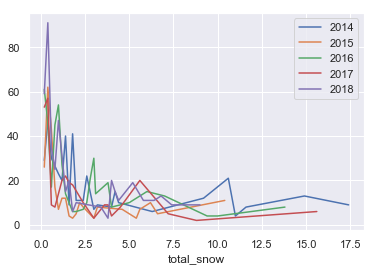

In [96]:
#Snow
snowday=master_data[['Calendar_Year','Total Snow (cm)','occurrencehour',]]\
.groupby(['Calendar_Year','Total Snow (cm)']).count().reset_index()\
.rename(columns={'Total Snow (cm)':'total_snow','occurrencehour':'Number_of_Occurrence'})

#defintely no snowy day.

snowday=snowday[snowday.total_snow> 0]

ax = plt.gca()
snowday[snowday['Calendar_Year']==2014].plot(kind='line',x='total_snow',y='Number_of_Occurrence',ax=ax)
snowday[snowday['Calendar_Year']==2015].plot(kind='line',x='total_snow',y='Number_of_Occurrence',ax=ax)
snowday[snowday['Calendar_Year']==2016].plot(kind='line',x='total_snow',y='Number_of_Occurrence',ax=ax)
snowday[snowday['Calendar_Year']==2017].plot(kind='line',x='total_snow',y='Number_of_Occurrence',ax=ax)
snowday[snowday['Calendar_Year']==2018].plot(kind='line',x='total_snow',y='Number_of_Occurrence',ax=ax)

ax.legend(["2014", "2015","2016","2017","2018"]);

plt.show()
#'Snow on Grnd (cm)'

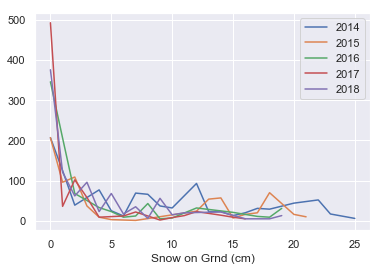

In [97]:
#Snow on ground
snowOnGround=master_data[['Calendar_Year','Snow on Grnd (cm)','occurrencehour']]\
.groupby(['Calendar_Year','Snow on Grnd (cm)']).count()\
.rename(columns={'occurrencehour':'Number_of_Occurrence'}).reset_index()

ax = plt.gca()
snowOnGround[snowOnGround['Calendar_Year']==2014].plot(kind='line',x='Snow on Grnd (cm)',y='Number_of_Occurrence',ax=ax)
snowOnGround[snowOnGround['Calendar_Year']==2015].plot(kind='line',x='Snow on Grnd (cm)',y='Number_of_Occurrence',ax=ax)
snowOnGround[snowOnGround['Calendar_Year']==2016].plot(kind='line',x='Snow on Grnd (cm)',y='Number_of_Occurrence',ax=ax)
snowOnGround[snowOnGround['Calendar_Year']==2017].plot(kind='line',x='Snow on Grnd (cm)',y='Number_of_Occurrence',ax=ax)
snowOnGround[snowOnGround['Calendar_Year']==2018].plot(kind='line',x='Snow on Grnd (cm)',y='Number_of_Occurrence',ax=ax)

ax.legend(["2014", "2015","2016","2017","2018"]);

plt.show()
#'Snow on Grnd (cm)'
